In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Домашнее задание 2: МГК/SVD

## 1. Выбор признаков
Выберите в Ваших данных 3-6 признаков, более или
менее относящихся к одному и тому же аспекту данных;
откомментируйте.


In [ ]:
# Загрузка данных
df = pd.read_csv('country_wise_latest.csv')

# Выбор признаков, связанных с COVID-19
features = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases']

# Проверка наличия этих признаков в датасете
selected_features = [feature for feature in features if feature in df.columns]
selected_data = df[selected_features]

# Первоначальный анализ выбранных признаков
selected_data.head()

,Confirmed,Deaths,Recovered,Active,New cases
0,36263,1269,25198,9796,106
1,4880,144,2745,1991,117
2,27973,1163,18837,7973,616
3,907,52,803,52,10
4,950,41,242,667,18


'Confirmed', 'Deaths', 'Recovered', 'Active' и 'New cases'. Эти признаки представляют собой общее количество подтвержденных случаев, смертей, выздоровевших, активных случаев и новых случаев заболевания соответственно.

## 2. Визуализация данных с использованием стандартизации размахом и z-scoring
Визуализируйте Ваши данные дважды, один раз с
использованием стандартизации размахом, второй –
путем z-scoring. Выберите какую-либо группу объектов и
выделите ее на визуализациях цветом или формой
«точек». Можно так выделить несколько групп.

Стандартизация размахом (Range Scaling): Преобразование данных таким образом, чтобы значения каждого признака были масштабированы в диапазоне от 0 до 1.

Z-scoring (Стандартизация Z-оценкой): Преобразование данных так, чтобы каждый признак имел среднее значение 0 и стандартное отклонение 1.

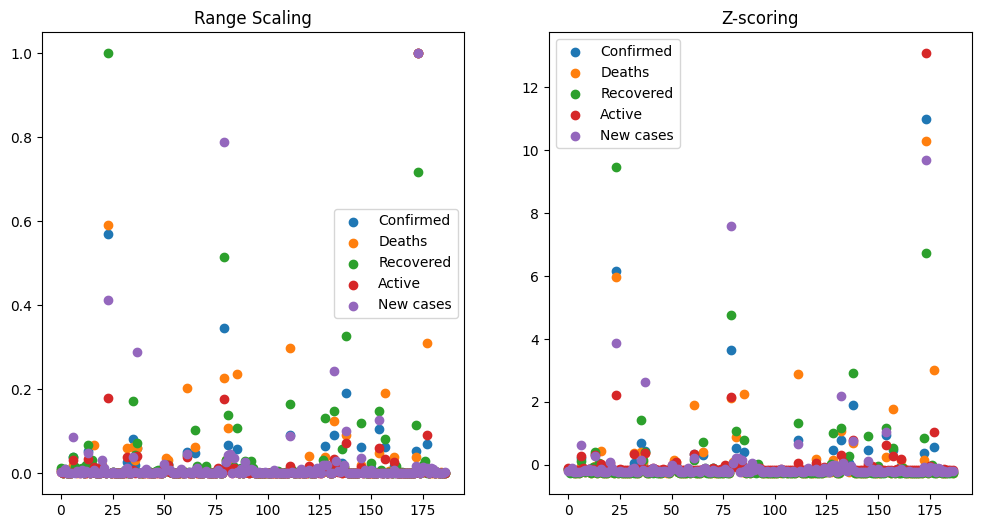

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Стандартизация размахом
scaler_range = MinMaxScaler()
data_scaled_range = scaler_range.fit_transform(selected_data)

# Z-scoring
scaler_z = StandardScaler()
data_scaled_z = scaler_z.fit_transform(selected_data)

# Визуализация стандартизированных данных
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Визуализация данных со стандартизацией размахом
ax[0].set_title('Range Scaling')
for i in range(data_scaled_range.shape[1]):
    ax[0].scatter(range(data_scaled_range.shape[0]), data_scaled_range[:, i], label=selected_features[i])
ax[0].legend()

# Визуализация данных с Z-scoring
ax[1].set_title('Z-scoring')
for i in range(data_scaled_z.shape[1]):
    ax[1].scatter(range(data_scaled_z.shape[0]), data_scaled_z[:, i], label=selected_features[i])
ax[1].legend()

plt.show()


1. Стандартизация Размахом (Range Scaling):

На первом графике представлены данные, стандартизированные размахом (MinMaxScaler).

Каждый признак ('Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases') масштабирован таким образом, что его минимальное значение становится 0, а максимальное – 1.

Этот метод полезен для визуализации относительных различий между значениями признаков.

2. Z-scoring (Стандартизация Z-оценкой):

На втором графике показаны данные, стандартизированные с использованием Z-scoring (StandardScaler).

Здесь каждый признак центрирован относительно среднего значения и масштабирован по его стандартному отклонению.

Этот подход часто используется для уменьшения влияния масштаба признаков в аналитических моделях.

## 3. Применение метода главных компонент (МГК) для визуализации
Примените традиционный метод МГК для визуализации
(для какого-либо способа нормализации) и убедитесь,
что получено то же самое, что и выше. Если нет –
объясните, в чем дело

Для упрощения мы будем использовать данные после Z-scoring. МГК помогает уменьшить размерность данных, выделяя главные компоненты, которые объясняют наибольшую долю вариативности в данных. Визуализируем первые две главные компоненты.

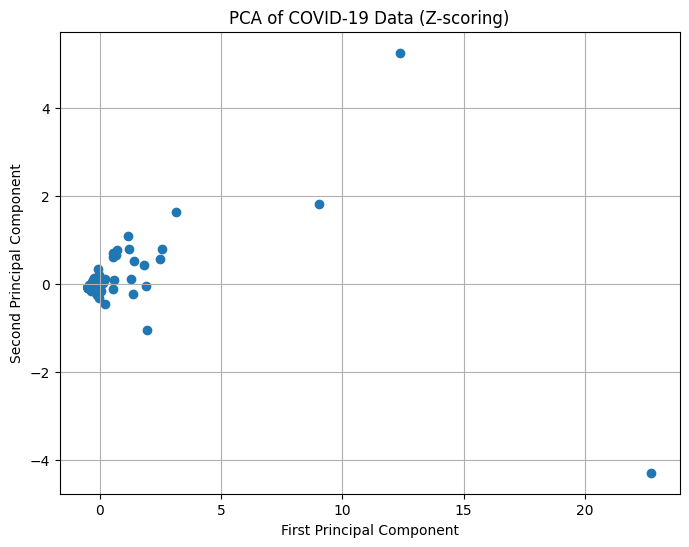

array([0.88424418, 0.06402039])

In [ ]:
from sklearn.decomposition import PCA

# Применение PCA к данным после Z-scoring
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled_z)

# Визуализация результатов PCA
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of COVID-19 Data (Z-scoring)')
plt.grid()
plt.show()

# Процент объясненной вариативности
explained_variance = pca.explained_variance_ratio_
explained_variance


explained_variance от PCA показывает, какой процент вариативности исходных данных каждая главная компонента объясняет.

первая компонента (0.88424418 или примерно 88.42%) объясняет большую часть вариативности данных, в то время как вторая компонента объясняет гораздо меньшую часть (0.06402039 или примерно 6.40%).

Это означает, что первая главная компонента улавливает большую часть информации (вариативности) исходных данных, а вторая — значительно меньше.

На графике представлены результаты применения метода главных компонент (МГК) к данным после Z-scoring. Каждая точка на графике представляет страну в пространстве первых двух главных компонент.

Первая главная компонента (ось X) объясняет примерно 88.4% вариативности в данных.

Вторая главная компонента (ось Y) объясняет дополнительные 6.4%.
Это означает, что суммарно первые две компоненты объясняют около 94.8% вариативности в данных. Это говорит о том, что большая часть информации в данных может быть представлена с помощью всего двух измерений.

## 4. Интерпретация главных компонент
Постарайтесь проинтерпретировать полученные
компоненты.

Первая главная компонента вероятно отражает общую серьезность ситуации с COVID-19 в стране, поскольку она объясняет большую часть вариативности и скорее всего коррелирует с высокими значениями всех выбранных признаков (подтвержденные случаи, смерти и т.д.).

Вторая главная компонента может отражать более тонкую структуру в данных, например, соотношение между количеством смертей и выздоровевших или активными случаями.